In [ ]:
#name - Ojas Gupta
# student Id - 202518057

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/ojasg/OneDrive/Desktop/machine learning/ML lab/clustering-using-scikit-learn-OjasCC/Mall_Customers.csv')
print(df.shape)
df.head()


Loaded dataframe shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:

df.info()
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:


X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy() 
#we want only annual income and spending score 
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


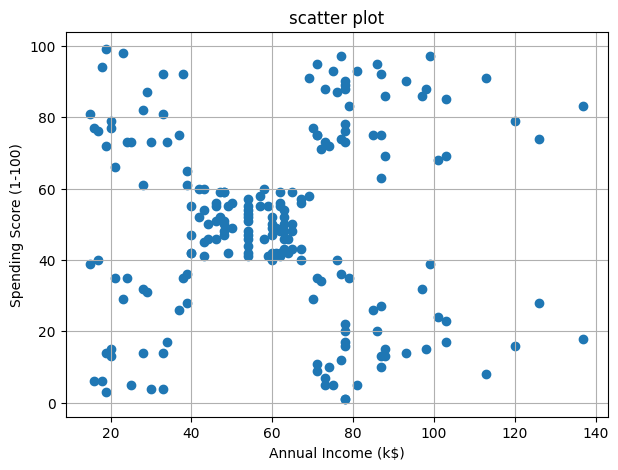

In [ ]:

# Initial scatter plot to visualize distribution
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.title('scatter plot')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()
#plotting scatter of annual income and spending score shows there can be 5 cluster in the dataset 


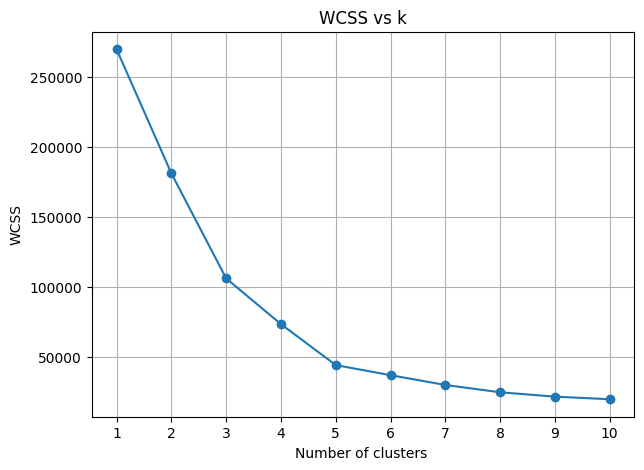

In [18]:

from sklearn.cluster import KMeans
import numpy as np
wcss = []
K_range = range(1,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(7,5))
plt.plot(list(K_range), wcss, marker='o')
plt.xticks(list(K_range))
plt.title('WCSS vs k')
plt.xlabel('Number of clusters ')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()
# for finding optimal value of k between 1 to 10 we are plotting the number of clusters (K) on the x-axis and the corresponding WCSS values on the y-axis.
# after plotting the graph we pick the point after which WCSS don't show any significant increase and we also saw this from scatter plot that there can be 5 cluster

In [ ]:

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_km = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
labels_km[:10], centroids
# the optimal k is 5 , so we use kmeans by picking random centroid to start with and fitting the data in model
# finally priting 10 customer's category

(array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32),
 array([[55.2962963 , 49.51851852],
        [86.53846154, 82.12820513],
        [25.72727273, 79.36363636],
        [88.2       , 17.11428571],
        [26.30434783, 20.91304348]]))

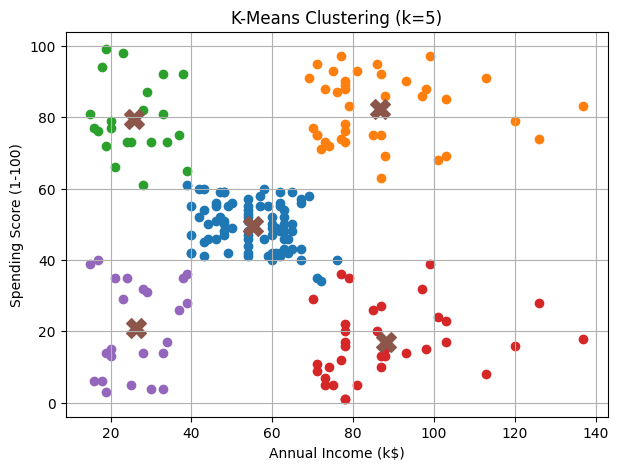

In [ ]:


plt.figure(figsize=(7,5))
import numpy as np
for label in np.unique(labels_km):
    plt.scatter(X.iloc[labels_km==label, 0], X.iloc[labels_km==label, 1])
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200)  
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()
# after training the model we are plotting the scatter plot for each cluster with centroid using numpy and loop over each data point
# the centroid are plotted using x marker 

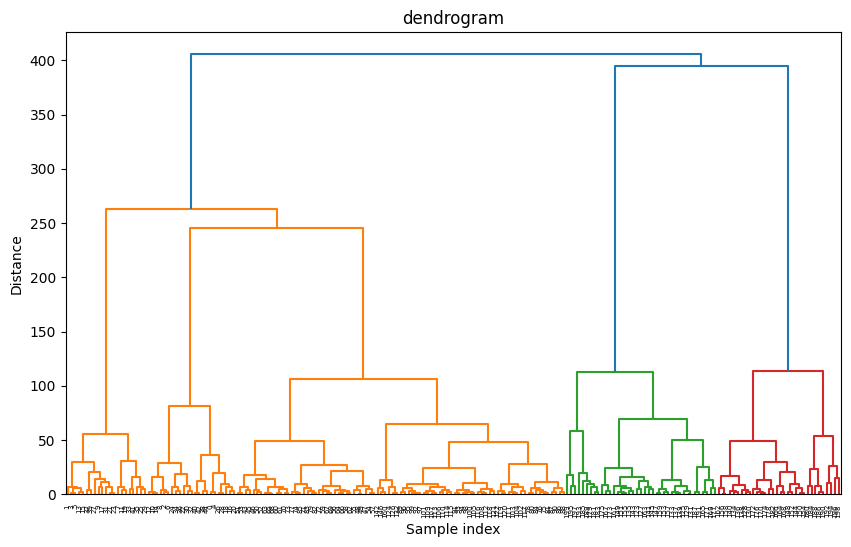

In [19]:

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Z = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode=None)
plt.title('dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
# the following plot is a dendrogram which show how the customers were merged based on category from bottom top , 
# where x axis show individual coustomer and as we go up we can see cluster of customer. the hieght of integration show how far were they from each other

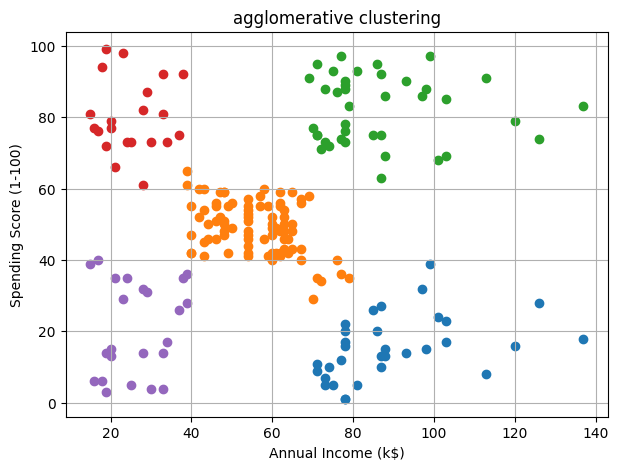

In [20]:


n_clusters_h = 5
agg = AgglomerativeClustering(n_clusters=n_clusters_h, linkage='ward')
labels_h = agg.fit_predict(X)

plt.figure(figsize=(7,5))
for lbl in np.unique(labels_h):
    plt.scatter(X.iloc[labels_h==lbl, 0], X.iloc[labels_h==lbl, 1])
plt.title(f'agglomerative clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()
# we are now trying agglomerative clustering method which involves merging datapoint bottom up utill the desired no of cluster remains
# we have chose =n 5 levels of hierarchy so as to minimize the variance and training the model
# next we are are looping through each cluster to plot each datapoint from 0 to 4
#plotting the scatter plot for the datapoints with different color for different cluster


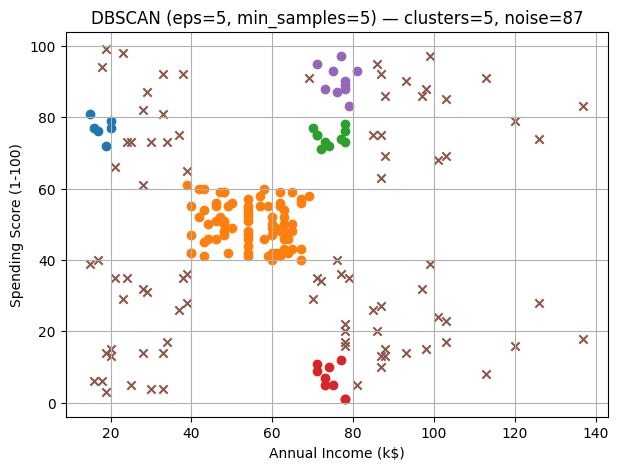

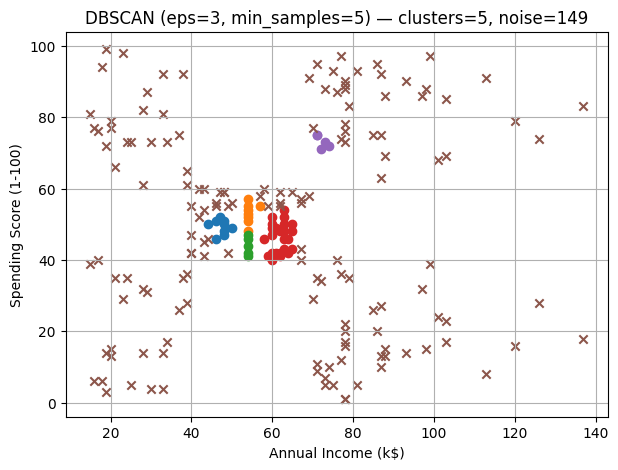

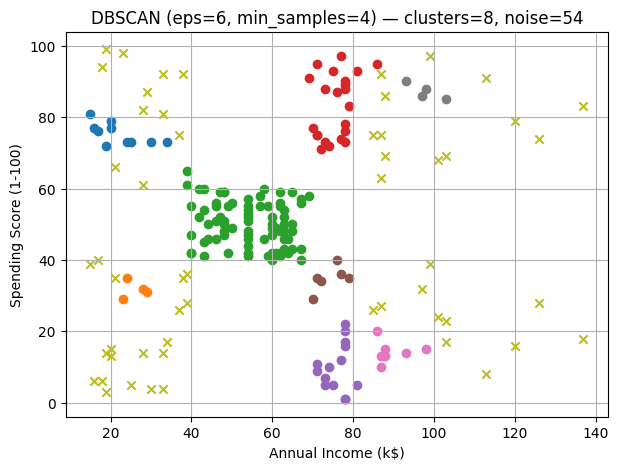

In [ ]:

from sklearn.cluster import DBSCAN

def run_dbscan(eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    plt.figure(figsize=(7,5))
    for lbl in set(labels):
        if lbl == -1:
            plt.scatter(X.iloc[labels==lbl,0], X.iloc[labels==lbl,1], marker='x')
        else:
            plt.scatter(X.iloc[labels==lbl,0], X.iloc[labels==lbl,1])
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples}) — clusters={n_clusters}, noise={n_noise}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.grid(True)
    plt.show()
    return labels


labels_db_1 = run_dbscan(eps=5, min_samples=5)
labels_db_2 = run_dbscan(eps=3, min_samples=5)
labels_db_3 = run_dbscan(eps=6, min_samples=4)
#now we are using DBscan that has that seperate points on different criteria like
# eps which Maximum distance to consider two points as neighbors.
# min_samples which Minimum number of neighbors for a point to be a core point.
#Any point reachable from a core point is also in the cluster.
#Points that don’t fit into any cluster are labeled as noise
# here made a function for dbscan that assign cluster and runs the algorithm
# based on no of noise and cluster formed we are plotting a scatter plot for visualizing the clusters and noise in the data 


In [ ]:
#Q1
# we used k =5 because the elbow plot of no of k vs WMCSS was getting flat after 5 and from the scatter plot we can see that there are 5 cluster.
# the dendrogram also showed levels between 4 to 6 

#Q2
# both kmeans and agglomerative performed well and gave 5 cluster but DBSCAN marked many points as outlier and depends too much on eps, 
# out of 3 algorthm dbscan gave the most irregular and odd shape

#Q3
# DBSCAN did detect noise for smaller `eps` values ,marking some sparse points as outliers. 
# Compared to K-Means and Hierarchical which assign every point to a cluster, DBSCAN's ability to mark noise is useful when you want to ignore occasional outliers in downstream analysis.

#Q4
# for this particular problem , as the group were clearly visible so kmean seems to be most effiecient algorithm and fast

#Q5
# for the group of high income and low spending we can infer that they are not finding value or worth in the shopping and hence spend less.
# we can tackle this problem by creating premium experience, personalized touch, more attention if we are able to make thier shopping experience worth paying for then they can spend more.